**Using Librosa for Audio-processing **

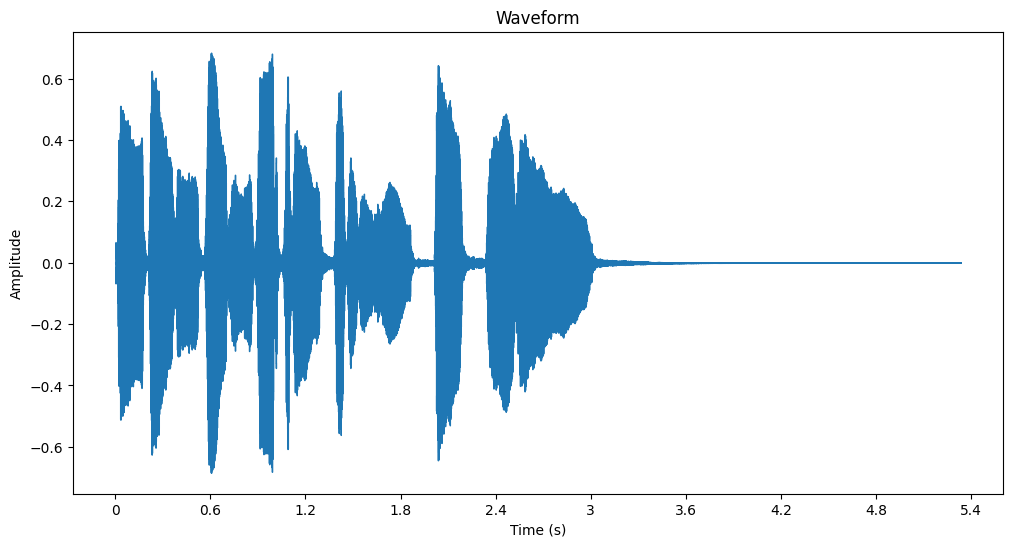

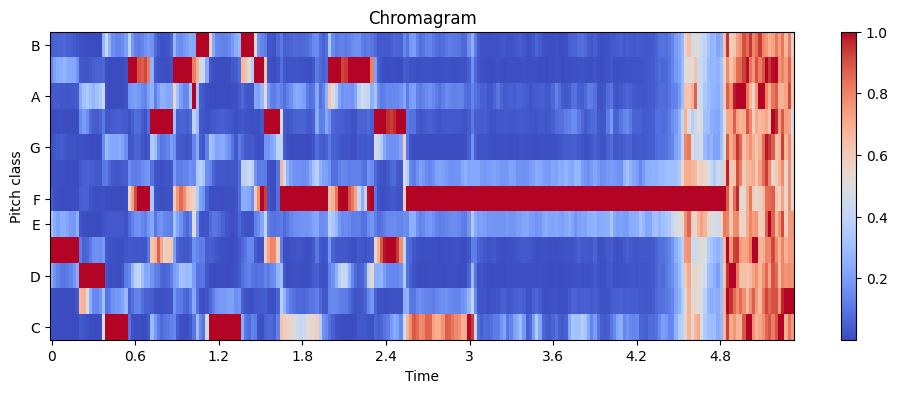

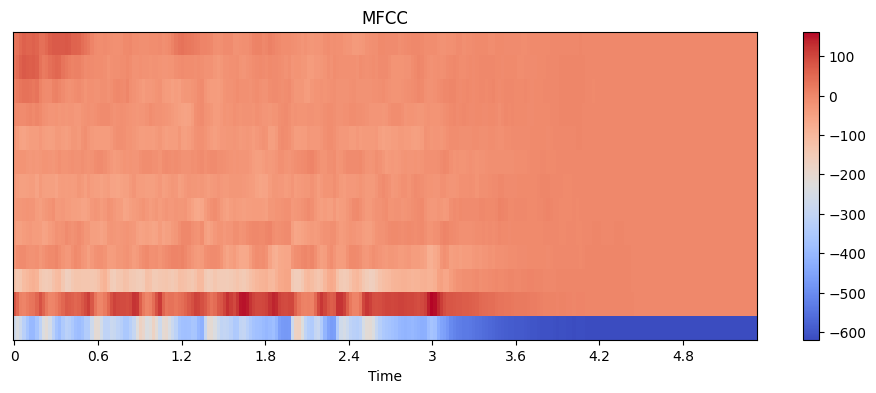

Tempo: 184.5703125 BPM
Beat times (s): [1.11455782 1.41641723 1.71827664 2.04335601]
Onset times (s): [0.06965986 0.23219955 0.39473923 0.60371882 0.74303855 0.92879819
 1.04489796 1.11455782 1.41641723 1.67183673 1.88081633 2.04335601
 2.20589569 2.36843537 2.55419501 3.0185941 ]


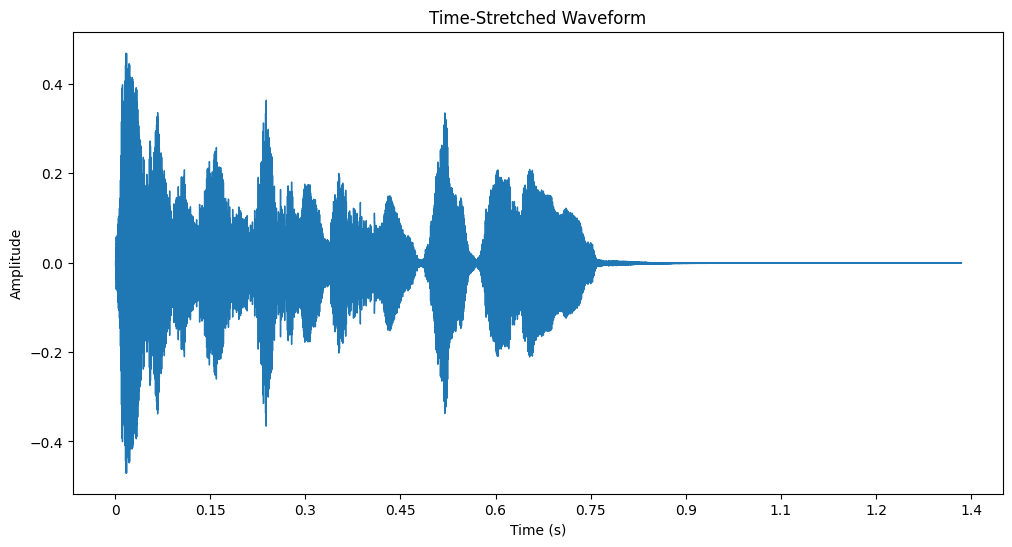

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_path = librosa.example('trumpet')
y, sr = librosa.load(audio_path)

# Display waveform
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Extract chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Chromagram')
plt.colorbar()
plt.show()

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

# Beat tracking
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(f'Tempo: {tempo} BPM')
print(f'Beat times (s): {beat_times}')

# Onset detection
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print(f'Onset times (s): {onset_times}')

# Time stretching
y_stretch = librosa.effects.time_stretch(y, rate=2.0)

# Display waveform of stretched audio
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y_stretch, sr=sr*2)
plt.title('Time-Stretched Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


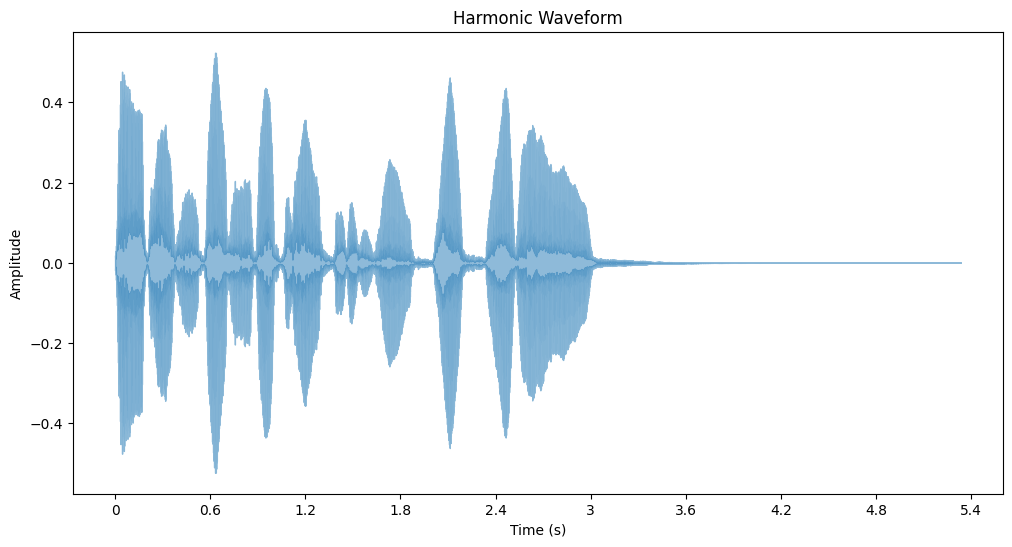

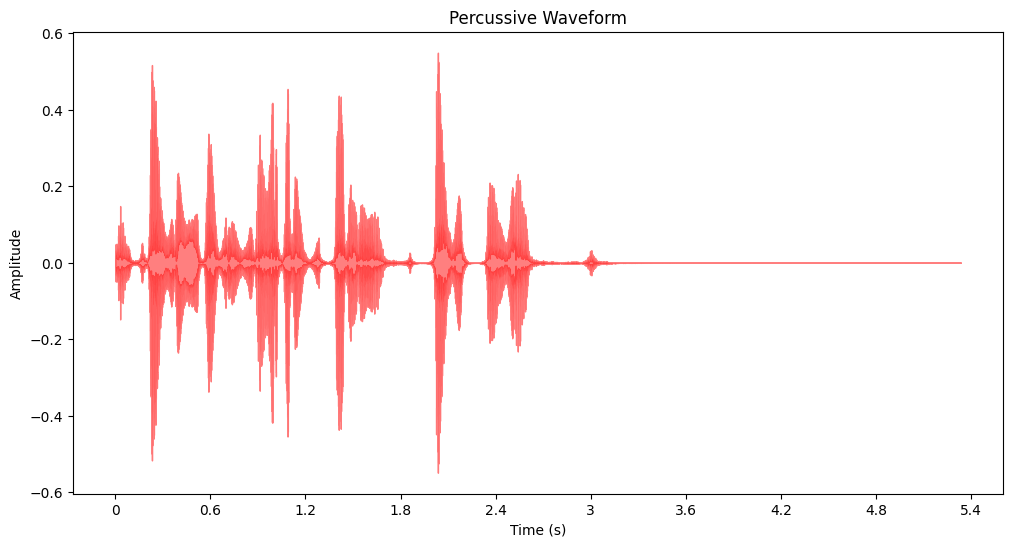

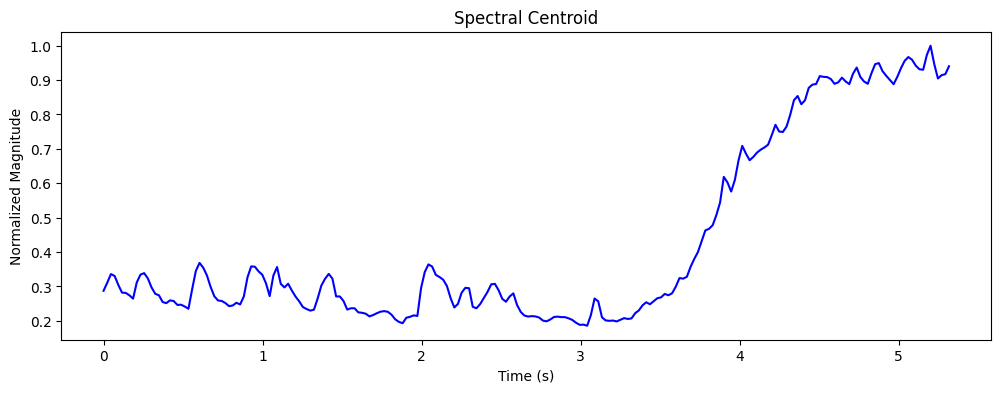

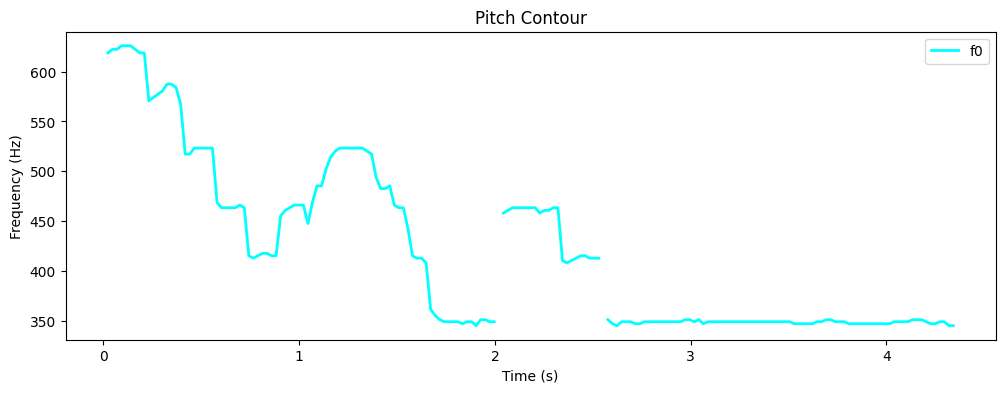

In [ ]:
# Harmonic-percussive source separation
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Display harmonic waveform
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.5)
plt.title('Harmonic Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display percussive waveform
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalize the spectral centroid for visualization
def normalize(x, axis=0):
    return librosa.util.normalize(x, axis=axis)

plt.figure(figsize=(12, 4))
plt.plot(t, normalize(spectral_centroids), color='b')
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Magnitude')
plt.show()



# Pitch estimation
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Plot pitch
plt.figure(figsize=(12, 4))
times = librosa.times_like(f0)
plt.plot(times, f0, label='f0', color='cyan', linewidth=2)
plt.title('Pitch Contour')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc='upper right')
plt.show()


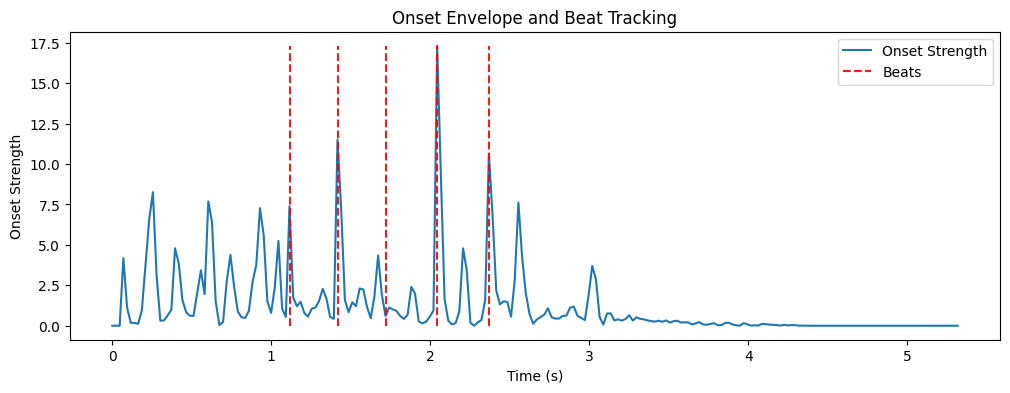

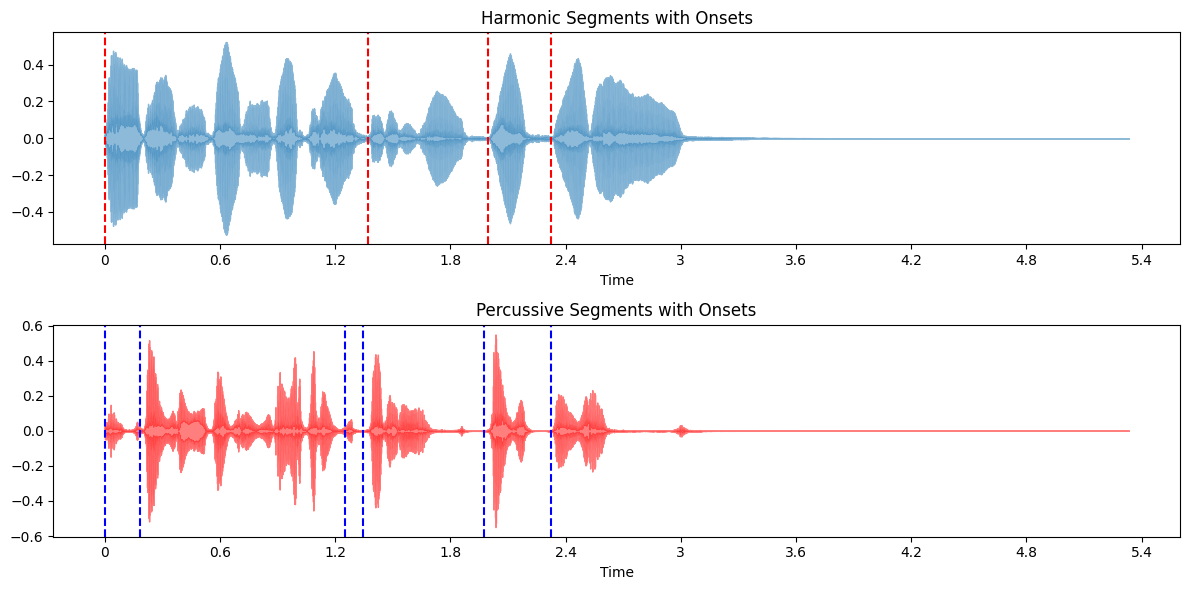

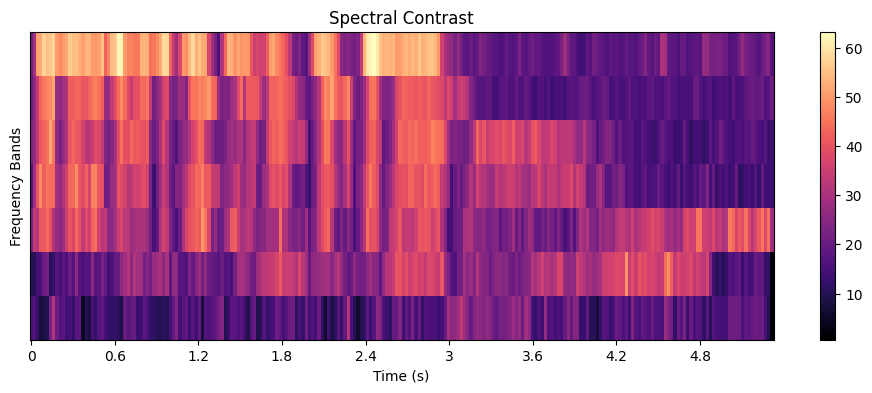

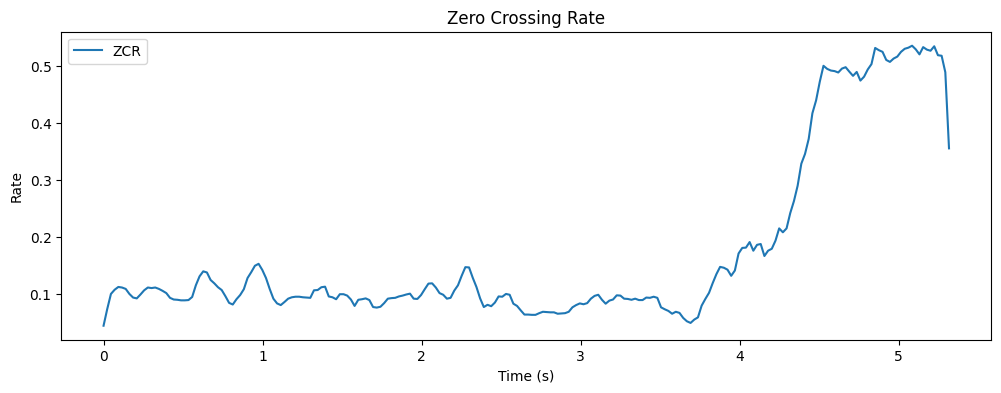

In [ ]:
# Tempo and beat tracking with onset envelope
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Plot the onset envelope
plt.figure(figsize=(12, 4))
plt.plot(librosa.times_like(onset_env), onset_env, label='Onset Strength')
plt.vlines(beat_times, 0, onset_env.max(), color='r', alpha=0.9, linestyle='--', label='Beats')
plt.xlabel('Time (s)')
plt.ylabel('Onset Strength')
plt.title('Onset Envelope and Beat Tracking')
plt.legend()
plt.show()

# Harmonic-percussive separation with onset detection
harmonic_onset = librosa.effects.split(y_harmonic, top_db=20)
percussive_onset = librosa.effects.split(y_percussive, top_db=20)

# Display segments of harmonic and percussive signals with onsets
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.5)
for interval in harmonic_onset:
    plt.axvline(interval[0] / sr, color='r', linestyle='--')
plt.title('Harmonic Segments with Onsets')
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
for interval in percussive_onset:
    plt.axvline(interval[0] / sr, color='b', linestyle='--')
plt.title('Percussive Segments with Onsets')
plt.tight_layout()
plt.show()

# Spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Plot spectral contrast
plt.figure(figsize=(12, 4))
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.ylabel('Frequency Bands')
plt.xlabel('Time (s)')
plt.show()

# Zero-crossing rate
zcr = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize=(12, 4))
plt.plot(librosa.times_like(zcr), zcr[0], label='ZCR')
plt.title('Zero Crossing Rate')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.legend()
plt.show()

# Dynamic time warping (DTW)
y_ref, sr_ref = librosa.load(librosa.example('trumpet', hq=True), sr=None)
D, wp = librosa.sequence.dtw(y, y_ref)

plt.figure(figsize=(12, 4))
plt.imshow(D, cmap='gray_r', origin='lower', extent=[0, len(y_ref), 0, len(y)])
plt.plot(wp[:, 1], wp[:, 0], marker='o', color='r')
plt.title('Dynamic Time Warping')
plt.xlabel('Reference Time')
plt.ylabel('Query Time')
plt.colorbar()
plt.show()
